Data Cleaning is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis.

Here you will be learning how to do data cleaning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db = pd.read_csv('../data/data_source.csv', na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Before Cleaning a dataset, you need to explore what has been stored in it. The column names, how many data points,
number of colum etc. All these questions needs to be answered

In [3]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

For better understanding of the columns, Exploring the data description [here](https://docs.google.com/spreadsheets/d/1wY7YZwyZ_r_8xMUe_N2ZQled4RjP0_T6/edit#gid=497912695) will help

In [4]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


## Handling Missing Values

In [5]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Diabetes dataset contains 12.5 % missing values.


In [6]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# Now which column(s) has missing values
db.isna().sum()/150001*100

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

Well, Looks like some columns has alot of missing values.

Up Next How to fix missing values

Fixing Missing values is a crucial part of any data science/ML project because you might be making the data better by your method or otherwise. So your decision has to be perfect or close enough.

The rule of thumb is for all object datatype kind of column/features use the mode method to fill the missing datapoints and for number kind of features use the mean/median method.

The question now is how to choose which method to fill a number feature with. Well the simple answer is check if it is skewed. Now what is skew?

Back to the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median. The idea is ....

Other method of dealing with missing values exists like fill-forward,backward-fill etc

You also need to consider what the column represent before you fill missing values for example:  ...

Another easy way to do this is to just drop all missing rows and moving on with analysis if you have data left atleast.

In [8]:
# # drop columns with more than 30% missing values
df_clean = db.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 
                    'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL',
                    'Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B',
                    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
                    'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
df_clean.shape

(150001, 45)

columns droped due to high number of missing values are:
* 'TCP DL Retrans. Vol (Bytes)'
* 'TCP UL Retrans. Vol (Bytes)', 
* 'HTTP DL (Bytes)'
* 'HTTP UL (Bytes)'
* 'Nb of sec with 125000B < Vol DL'
* 'Nb of sec with 125000B < Vol DL'
* 'Nb of sec with 1250B < Vol UL < 6250B'
* 'Nb of sec with 31250B < Vol DL < 125000B'
* 'Nb of sec with 37500B < Vol UL'
* 'Nb of sec with 6250B < Vol DL < 31250B'
* 'Nb of sec with 6250B < Vol UL < 37500B'

In [9]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

# df_clean['diag_1'] = fix_missing_ffill(df_clean, 'diag_1')
# df_clean['diag_2'] = fix_missing_ffill(df_clean, 'diag_2')
# df_clean['diag_3'] = fix_missing_ffill(df_clean, 'diag_3')

# fill 'race' column with mode 
# df_clean['race'] = df_clean['race'].fillna(df_clean['race'].mode()[0])

In [10]:
percent_missing(df_clean)

The Diabetes dataset contains 1.02 % missing values.


In [11]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [12]:
# df_clean_bearer[df_clean_bearer['MSISDN/Number'] == 33664962239.0]

In [13]:
# for customer in df_clean_bearer['MSISDN/Number'].unique():
#     fix_missing_ffill(df_clean_bearer[df_clean_bearer['MSISDN/Number'] == customer],"Last Location Name")

In [14]:
# len(df_clean['Bearer Id'].unique()) - len(df_clean['Bearer Id'])

In [15]:
# Let's remove missing MSISDN/Number
df_clean_customers = df_clean[~df_clean['MSISDN/Number'].isna()]
df_clean_bearer = df_clean_customers[~df_clean_customers['Bearer Id'].isna()]

In [16]:
percent_missing(df_clean_customers)

The Diabetes dataset contains 0.95 % missing values.


In [17]:
percent_missing(df_clean_bearer)

The Diabetes dataset contains 0.94 % missing values.


In [18]:
len(df_clean_bearer["Last Location Name"].unique())

45380

In [19]:
print(df_clean_bearer["MSISDN/Number"].mode().apply(lambda x: '%.17f' % x).values.tolist())

['33626320676.00000000000000000']


In [20]:
print(df_clean_bearer["MSISDN/Number"].apply(lambda x: '%.17f' % x).value_counts())

33626320676.00000000000000000    18
33625779332.00000000000000000    17
33614892860.00000000000000000    17
33659725664.00000000000000000    16
33675877202.00000000000000000    15
                                 ..
33666491677.00000000000000000     1
33643963938.00000000000000000     1
33678021303.00000000000000000     1
33662383950.00000000000000000     1
33687641710.00000000000000000     1
Name: MSISDN/Number, Length: 106471, dtype: int64


In [21]:
df_clean_bearer["Last Location Name"].value_counts()

D41377B                  80
D17085A                  59
D72396C                  57
D73604C                  55
9.16456698599501E+015    55
                         ..
U21315C                   1
W64850B                   1
T73213C                   1
L54352A                   1
T87896B                   1
Name: Last Location Name, Length: 45379, dtype: int64

In [22]:
df_clean_bearer["MSISDN/Number"]

0         3.366496e+10
1         3.368185e+10
2         3.376063e+10
3         3.375034e+10
4         3.369980e+10
              ...     
149995    3.366865e+10
149996    3.365069e+10
149997    3.366345e+10
149998    3.362189e+10
149999    3.361962e+10
Name: MSISDN/Number, Length: 148506, dtype: float64

In [23]:
df_clean_bearer.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [24]:
def map_df(function, df,columns):
    for col in columns:
        df[col] = function(df, col)
    return df

In [25]:
## handle missing values

df_clean_nan = map_df(fix_missing_ffill,df_clean_bearer, ["Last Location Name","Avg RTT DL (ms)","Avg RTT UL (ms)","DL TP < 50 Kbps (%)",
                                                         "50 Kbps < DL TP < 250 Kbps (%)","250 Kbps < DL TP < 1 Mbps (%)",
                                                         "DL TP > 1 Mbps (%)",
                                                          "UL TP < 10 Kbps (%)",
                                                          "10 Kbps < UL TP < 50 Kbps (%)",
                                                          "50 Kbps < UL TP < 300 Kbps (%)",
                                                          "UL TP > 300 Kbps (%)",
                                                          "Nb of sec with Vol DL < 6250B","Nb of sec with Vol UL < 1250B"])

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df_clean_nan.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

Other missing columns can be fixed based on your understanding, you can decide to drop or fill using appropriate methods. Whichever you decide, explain your reasons  

## Transforming Data

**Scaling and Normalization**

Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

    - in scaling, you're changing the range of your data, while
    - in normalization, you're changing the shape of the distribution of your data.

Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).




In [96]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
# original_data = pd.DataFrame(np.random.exponential(200, size=2000))

# original_data.sample(5)

,0
546,394.486257
1506,50.414803
597,21.379119
1442,30.600932
1353,53.430010


In [98]:
original_data[0].min(), original_data[0].max()

(0.042567346316662945, 1310.1450325364626)

In [ ]:
count, bins, ignored = plt.hist(original_data)
plt.show()

In [34]:
df_clean_nan.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [27]:
numerical_data = df_clean_nan[[
    'Bearer Id',
 'Start ms',
 'Dur. (ms)',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)'
                              ]]

In [28]:
# numerical_data.info()

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


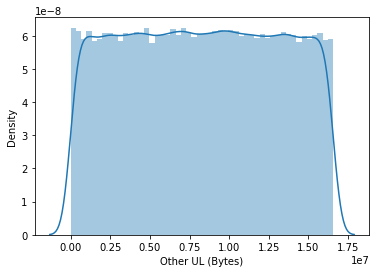

In [31]:
sns.distplot(numerical_data['Other UL (Bytes)'])

In [34]:
# skewness and kurtosis
print("Skewness: %f" % numerical_data['Other UL (Bytes)'].skew())
print("Skewness: %f" % numerical_data['Other UL (Bytes)'].kurt())

Skewness: 0.001611
Skewness: -1.191792


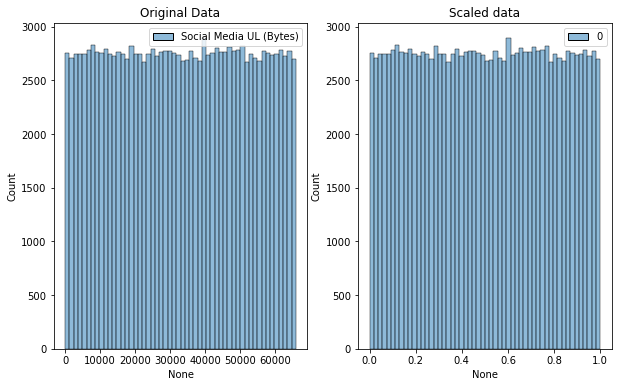

In [95]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(numerical_data)

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

    Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

In [84]:
numerical_data.columns

Index(['Bearer Id', 'Start ms', 'Dur. (ms)', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

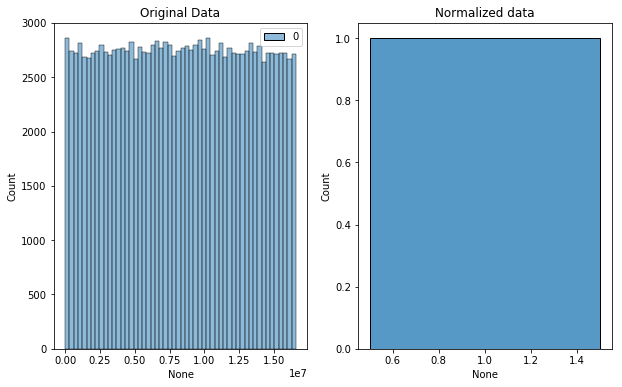

In [37]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(numerical_data)

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

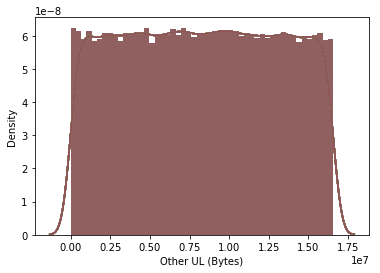

In [39]:
for col in numerical_data.columns.tolist():
    sns.distplot(numerical_data['Other UL (Bytes)'])

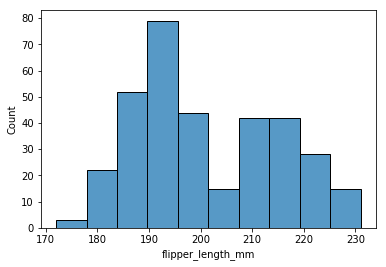

In [69]:
# penguins = sns.load_dataset("penguins")
# sns.histplot(data=penguins, x="flipper_length_mm")

In [ ]:
def fix_age(col):
    weight = [x.replace( '[', '' ).replace( ')', '' ) for x in col.fillna('') ]
    new_age = [ ( ( int(i.split('-')[0] ) + int( i.split('-')[1] ) ) / 2)  for i in weight]
    return weight

df_clean['fix_age'] = fix_age(df_clean['age'])

In [ ]:

df_clean['diag_1'] = pd.to_numeric(df_clean['diag_1'], errors='coerce')
df_clean['diag_2'] = pd.to_numeric(df_clean['diag_2'], errors='coerce')
df_clean['diag_3'] = pd.to_numeric(df_clean['diag_3'], errors='coerce')


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   admission_type_id         101766 non-null  int64  
 6   discharge_disposition_id  101766 non-null  int64  
 7   admission_source_id       101766 non-null  int64  
 8   time_in_hospital          101766 non-null  int64  
 9   num_lab_procedures        101766 non-null  int64  
 10  num_procedures            101766 non-null  int64  
 11  num_medications           101766 non-null  int64  
 12  number_outpatient         101766 non-null  int64  
 13  number_emergency          101766 non-null  i

In [ ]:
df_clean['fix_age'].unique()

array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
       '70-80', '80-90', '90-100'], dtype=object)

In [ ]:
   df_clean['age'] = [ ((int(i.split('-')[0]) + int(i.split('-')[1])) / 2)  for i in df_clean['fix_age']]

## Utility Functions

In [45]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

## Extracting Data

In [ ]:
db['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [ ]:
percent_missing(df_clean)

The Diabetes dataset contains 0.2 % missing values.


In [ ]:
missing_values_table(df_clean)

Your selected dataframe has 46 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Dtype
diag_3,5131,5.00,float64
diag_2,2538,2.50,float64
diag_1,1645,1.60,float64


In [ ]:
def map_readmitted(col):
    readmitted_map = {'NO' : 'NO', '>30': 'YES', '<30': 'YES'}
    return col.map(readmitted_map)

db['fix_readmitted'] = map_readmitted(db['readmitted'])

In [ ]:
# unique encounter id
db['change'].unique()

array(['No', 'Ch'], dtype=object)

In [ ]:
db.shape

(101766, 51)

In [ ]:
db['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [ ]:
db['fix_age'] = fix_age(db['age'])

In [ ]:
db['fix_age'].value_counts()

70-80     26068
60-70     22483
50-60     17256
80-90     17197
40-50      9685
30-40      3775
90-100     2793
20-30      1657
10-20       691
0-10        161
Name: fix_age, dtype: int64

## Exploration

Data Exploration or Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics which include:


*   detection of mistakes, outliers or abnormalities
*   determining relationships among the explanatory variables
*   assessing the relationships between explanatory and outcome variables





In [40]:
dfExp = df_clean_nan.copy()
dfExp

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [41]:
dfExp.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         float64
Activity Duration UL (ms)         

In [43]:
numerical_data.columns

Index(['Bearer Id', 'Start ms', 'Dur. (ms)', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

### Univariate Analysis

This is mainly analysis done on particular variable only i.e we search for the data charecteristics of a variable with disregard to all the other columns

#### distributions

In [55]:
numerical_data.shape

(148506, 36)

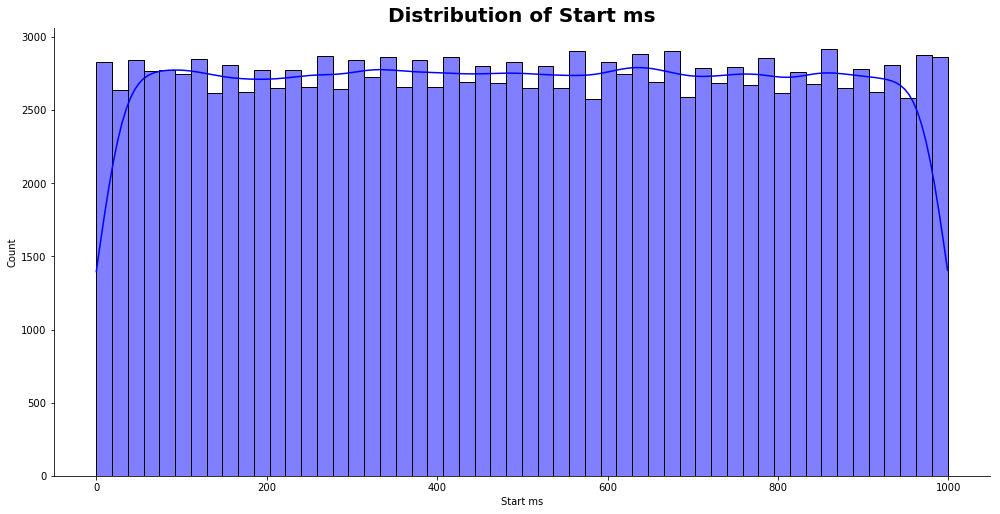

In [46]:
plot_hist(dfExp, "Start ms", "blue")

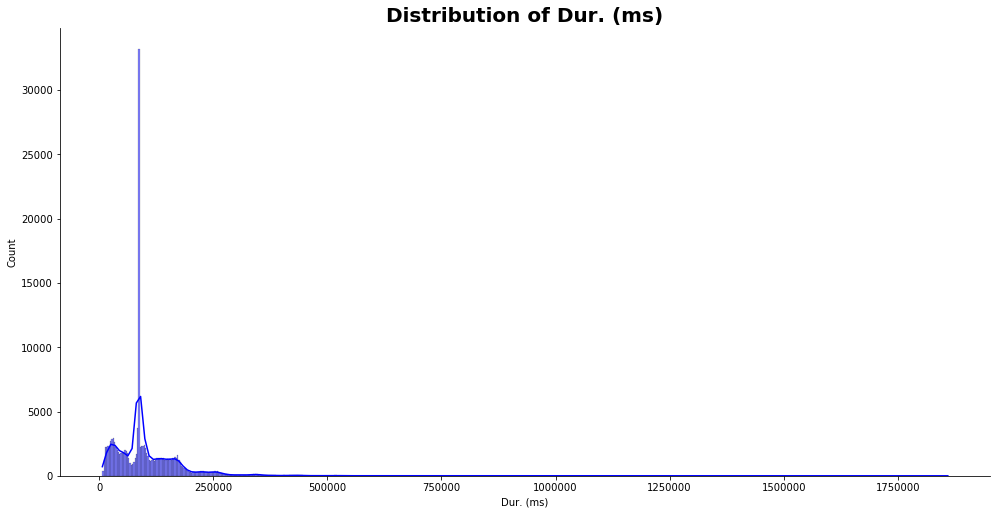

In [58]:
plot_hist(dfExp, 'Dur. (ms)',  "blue")

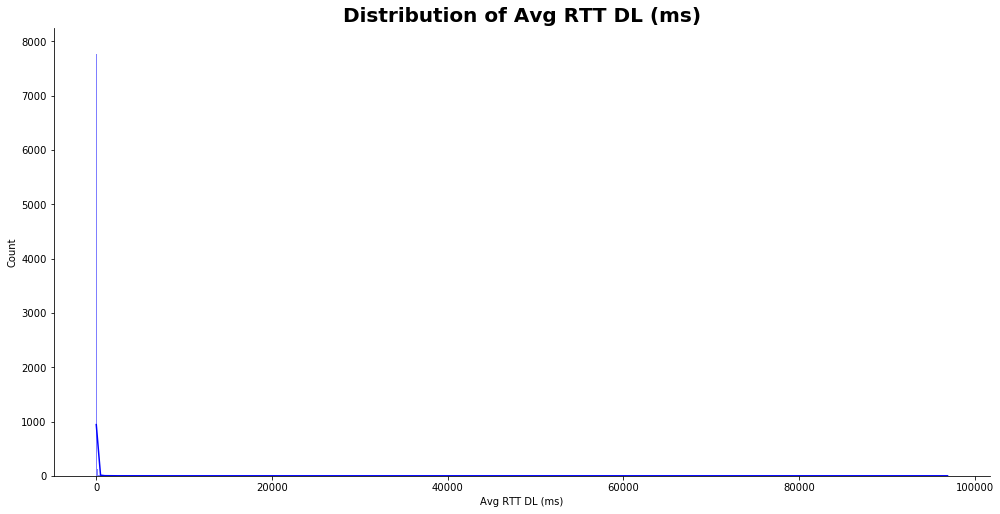

In [59]:
plot_hist(dfExp,'Avg RTT DL (ms)', "blue")

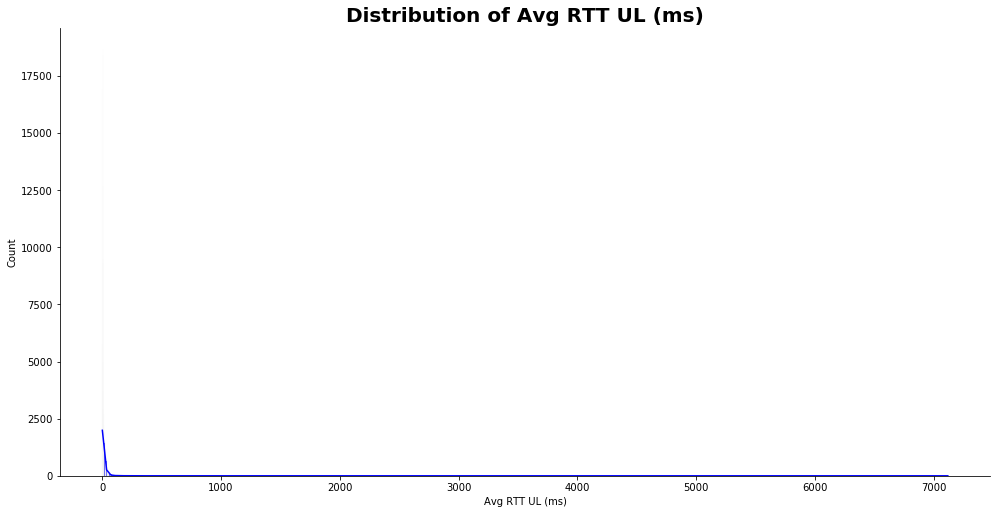

In [60]:
plot_hist(dfExp, 
       'Avg RTT UL (ms)',  "blue")

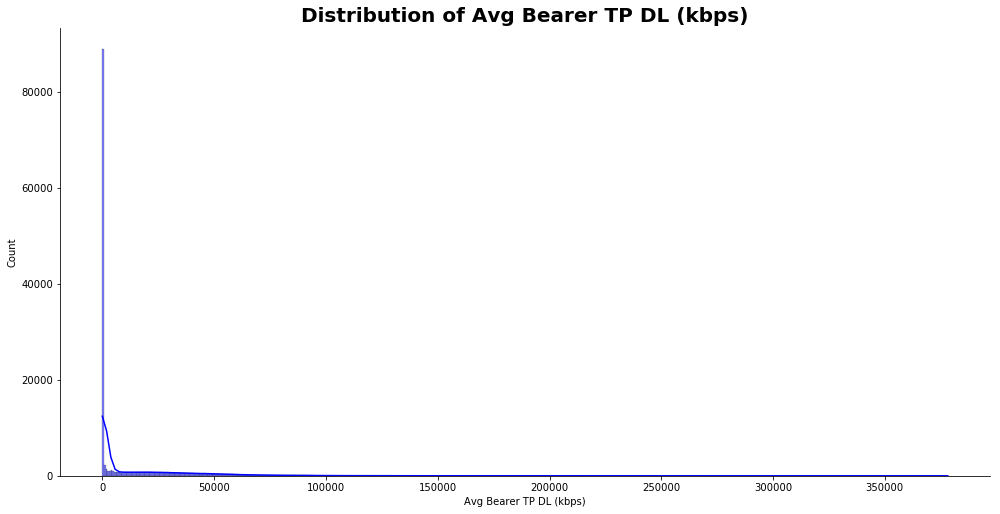

In [61]:
plot_hist(dfExp, 'Avg Bearer TP DL (kbps)',  "blue")

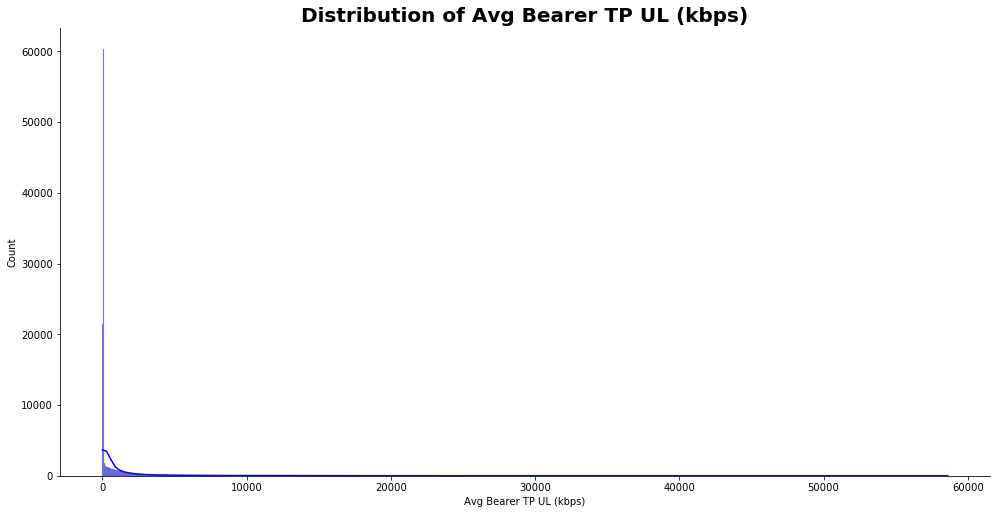

In [62]:
plot_hist(dfExp, 'Avg Bearer TP UL (kbps)', "blue")

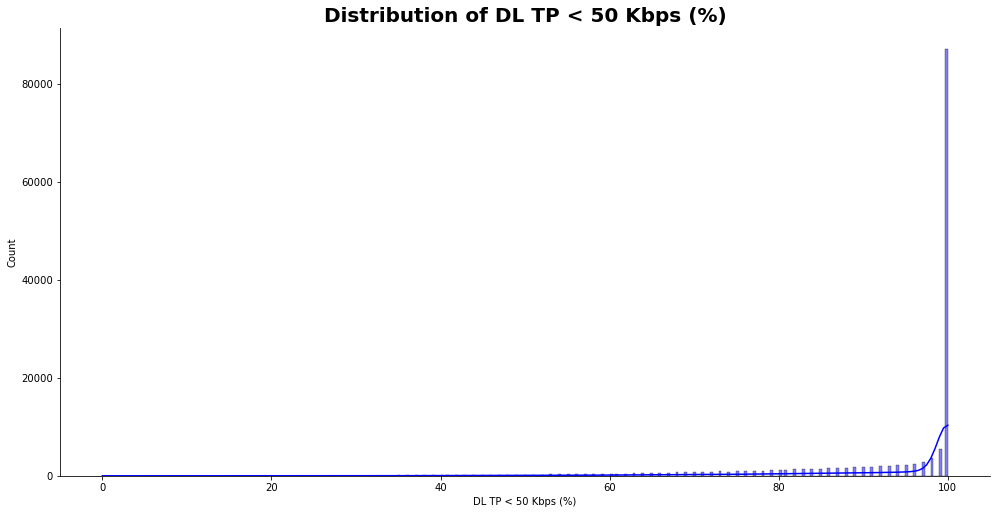

In [64]:
plot_hist(dfExp, 'DL TP < 50 Kbps (%)', "blue")

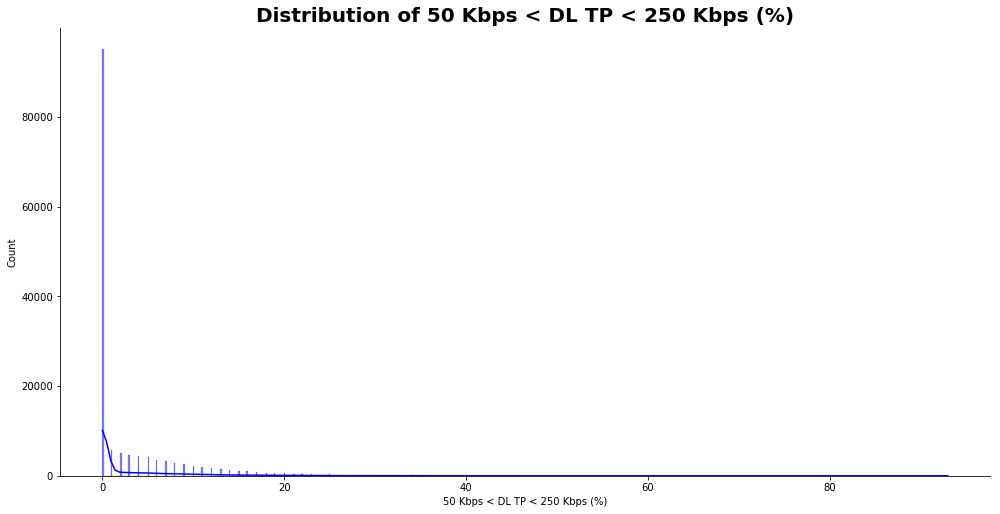

In [66]:
plot_hist(dfExp,'50 Kbps < DL TP < 250 Kbps (%)',"blue")

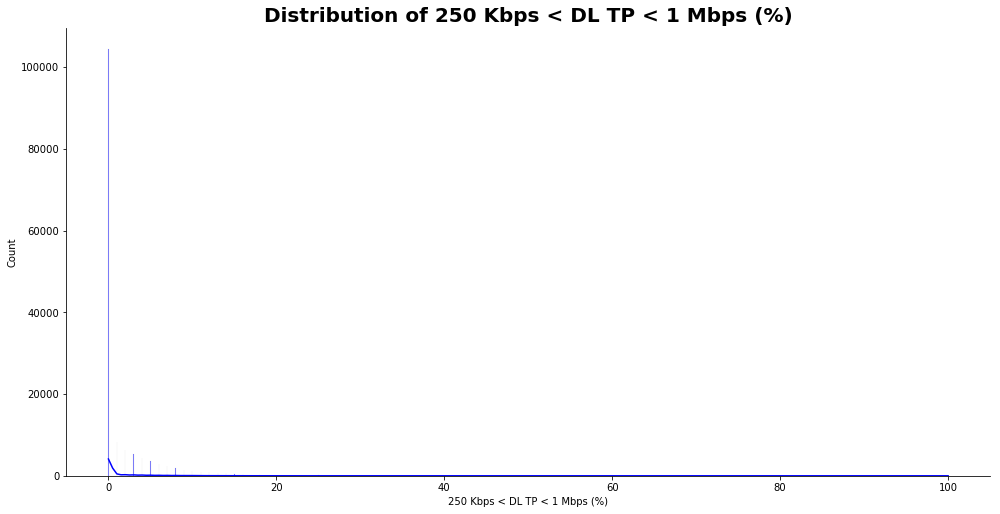

In [67]:
plot_hist(dfExp, 
       '250 Kbps < DL TP < 1 Mbps (%)', "blue")

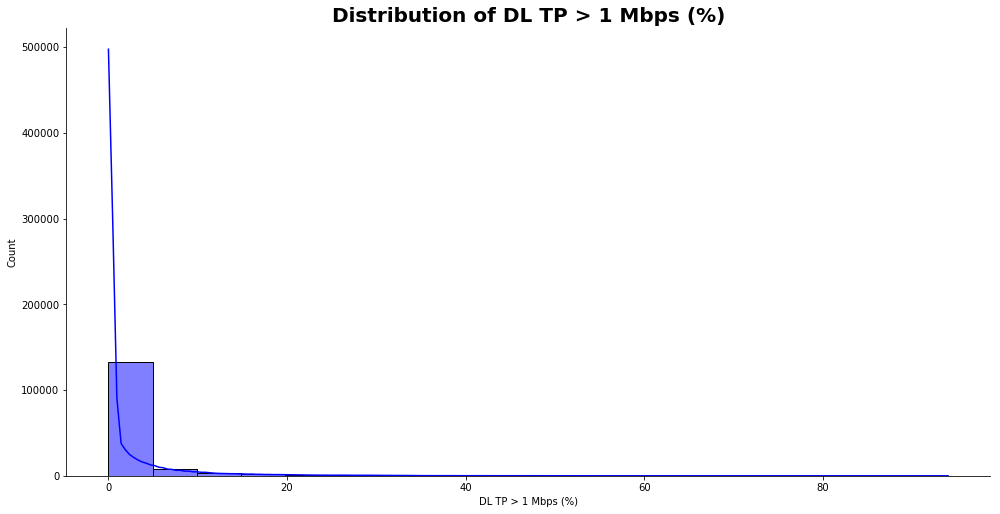

In [68]:
plot_hist(dfExp, 'DL TP > 1 Mbps (%)', "blue")

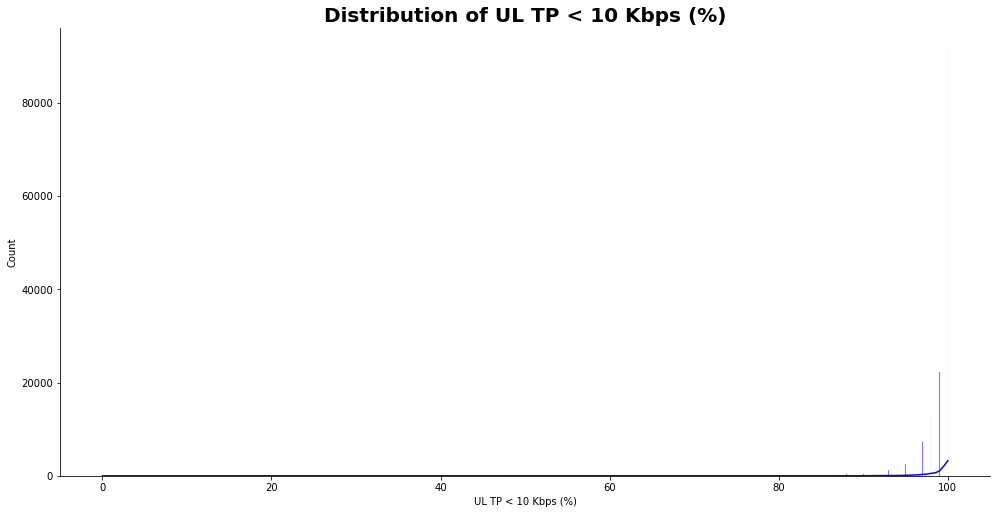

In [69]:
plot_hist(dfExp,'UL TP < 10 Kbps (%)',  "blue")

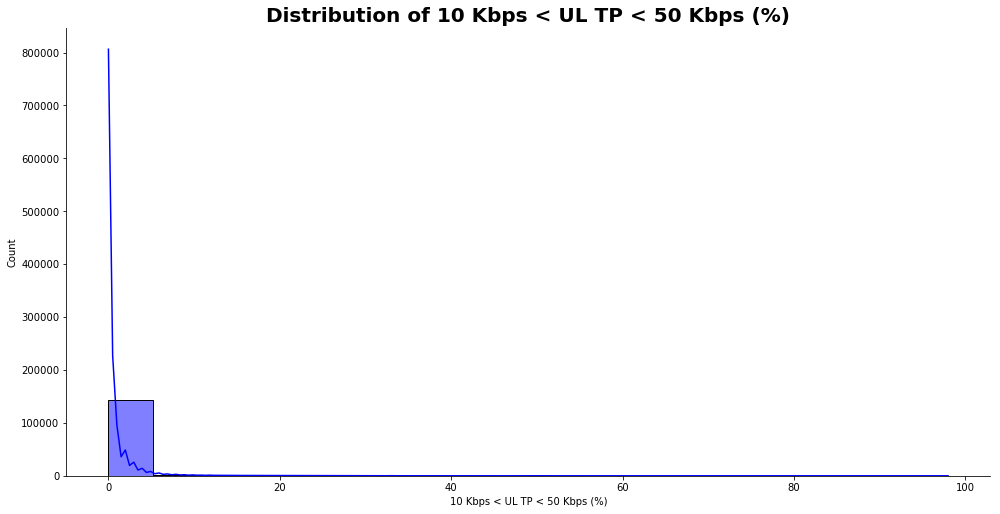

In [70]:
plot_hist(dfExp, '10 Kbps < UL TP < 50 Kbps (%)', "blue")

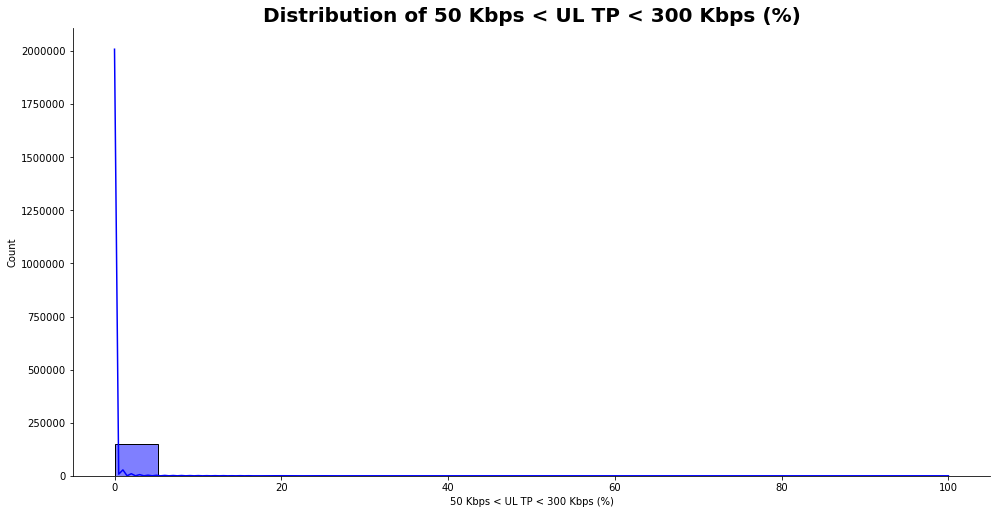

In [71]:
plot_hist(dfExp, 
       '50 Kbps < UL TP < 300 Kbps (%)', "blue")

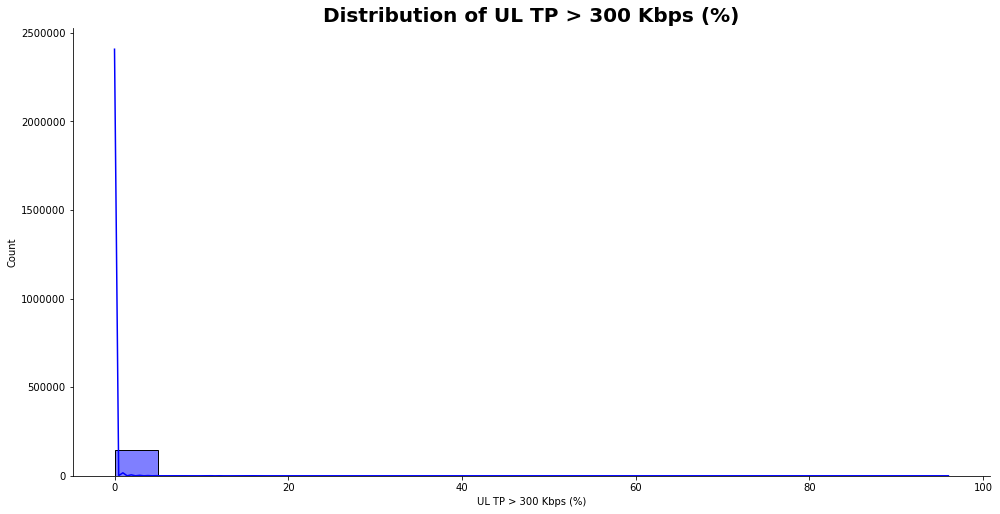

In [72]:
plot_hist(dfExp, 'UL TP > 300 Kbps (%)',"blue")

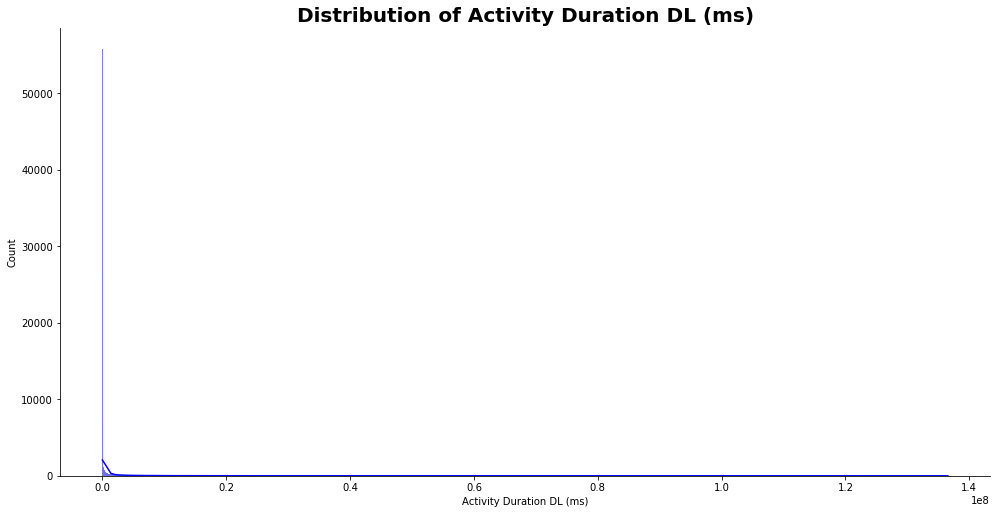

In [73]:
plot_hist(dfExp, 
       'Activity Duration DL (ms)', "blue")

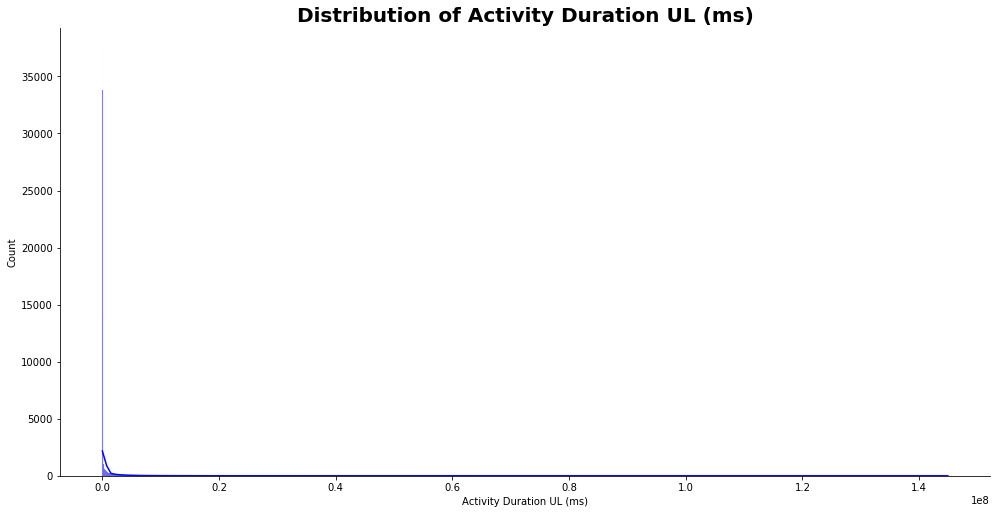

In [74]:
plot_hist(dfExp, 'Activity Duration UL (ms)',"blue")

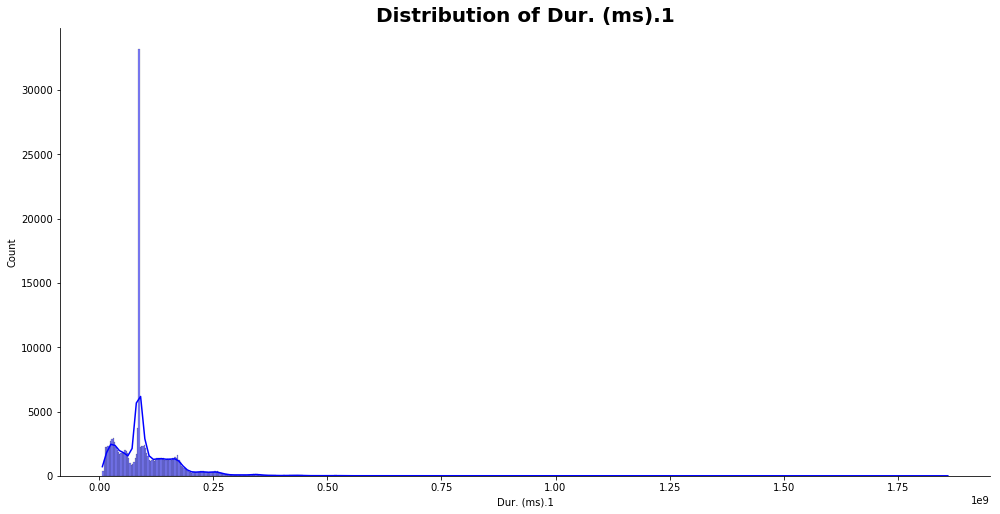

In [75]:
plot_hist(dfExp, 'Dur. (ms).1',"blue")

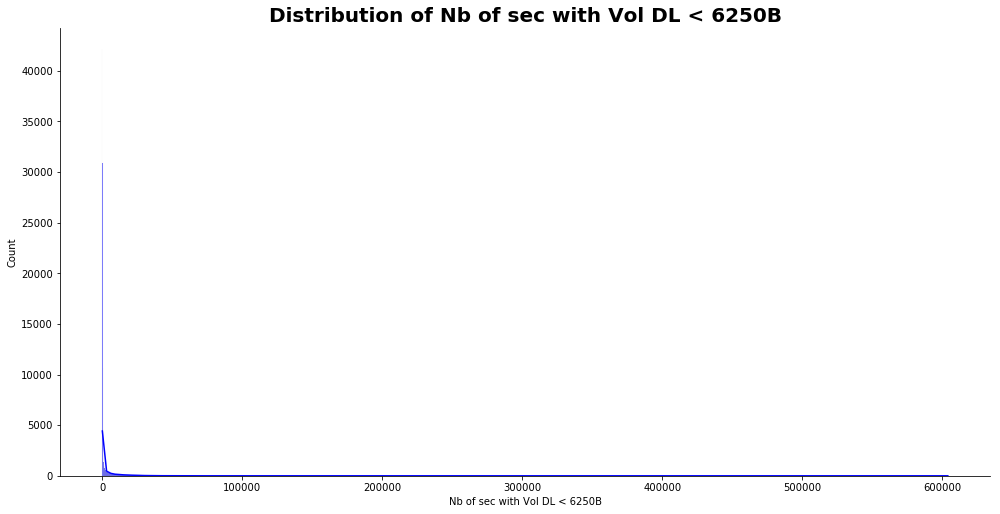

In [76]:
plot_hist(dfExp, 
       'Nb of sec with Vol DL < 6250B', "blue")

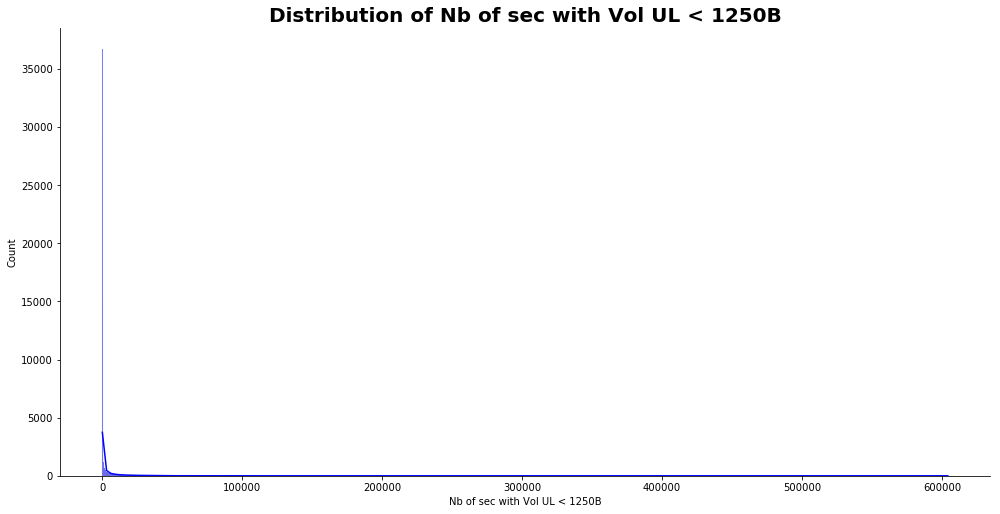

In [77]:
plot_hist(dfExp,  'Nb of sec with Vol UL < 1250B', "blue")

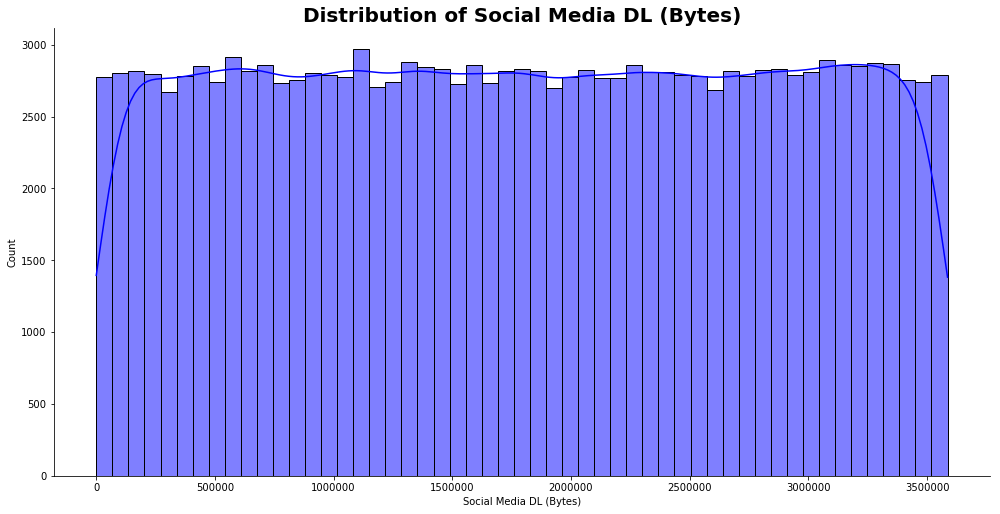

In [78]:
plot_hist(dfExp,
       'Social Media DL (Bytes)', "blue")

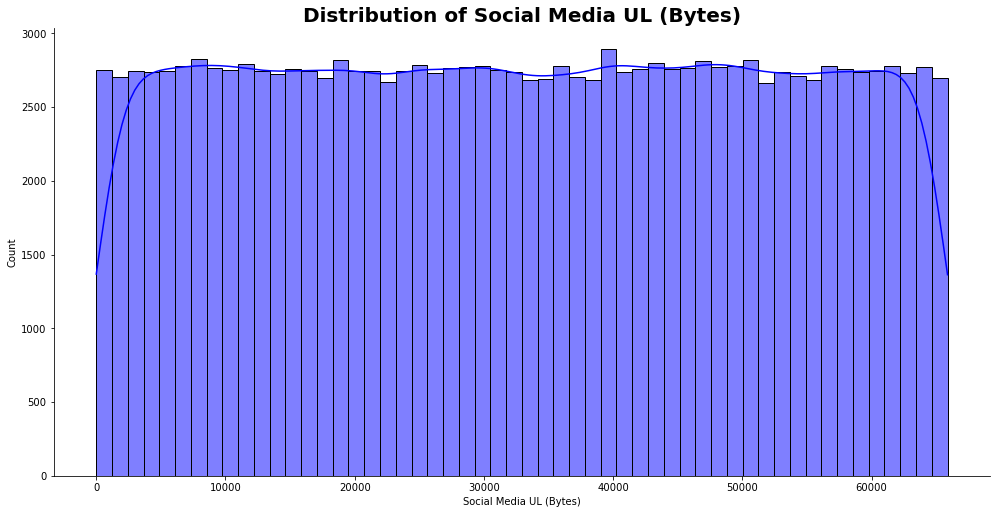

In [79]:
plot_hist(dfExp, 'Social Media UL (Bytes)', "blue")

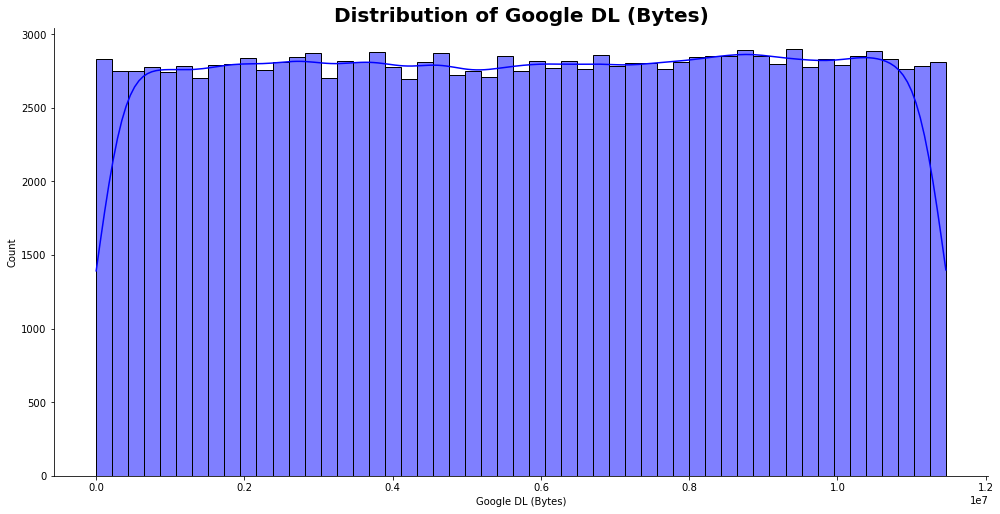

In [80]:
plot_hist(dfExp,
       'Google DL (Bytes)',"blue")

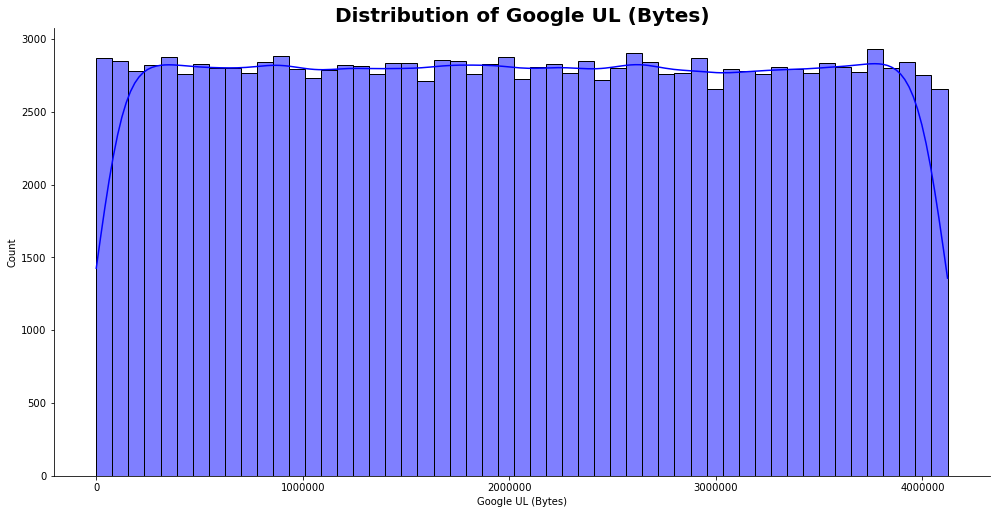

In [81]:
plot_hist(dfExp,  'Google UL (Bytes)',  "blue")

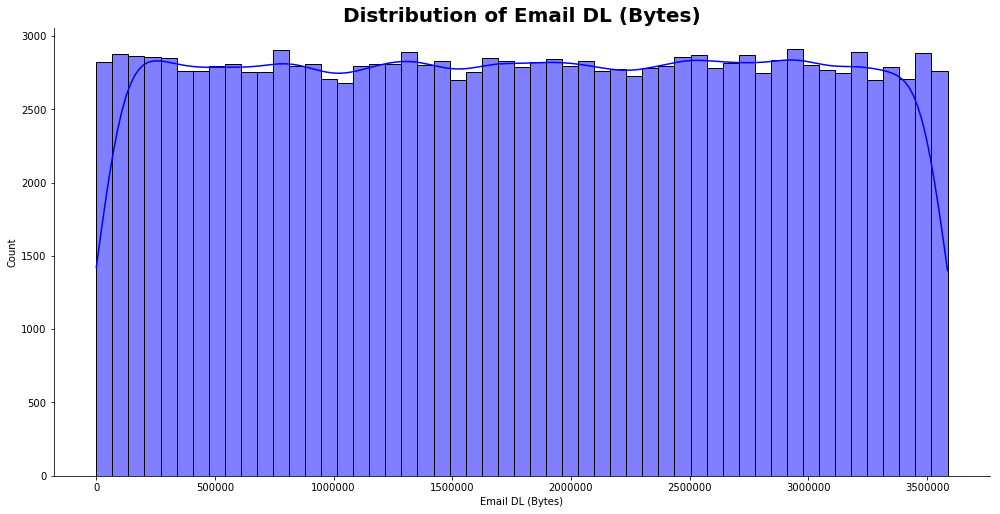

In [83]:
plot_hist(dfExp, 'Email DL (Bytes)',"blue")

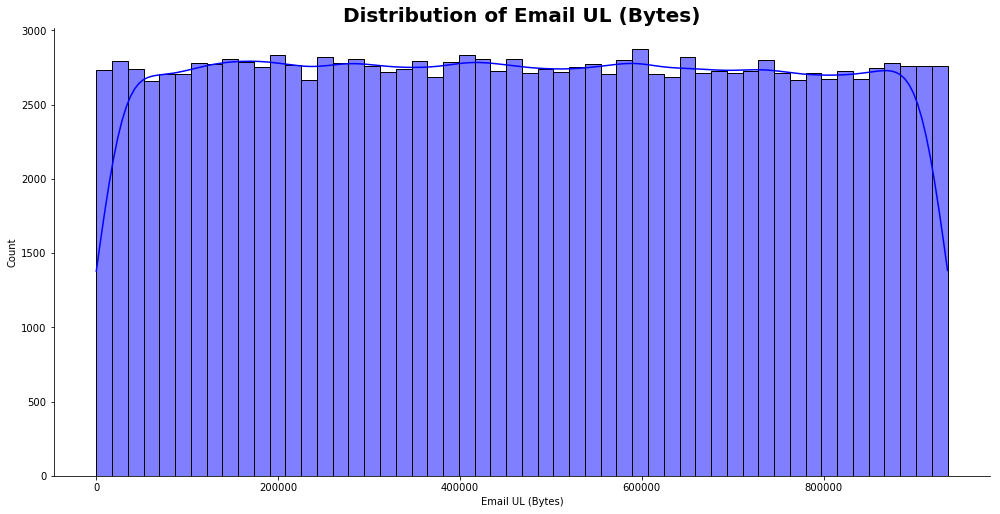

In [87]:
plot_hist(dfExp,'Email UL (Bytes)',"blue")

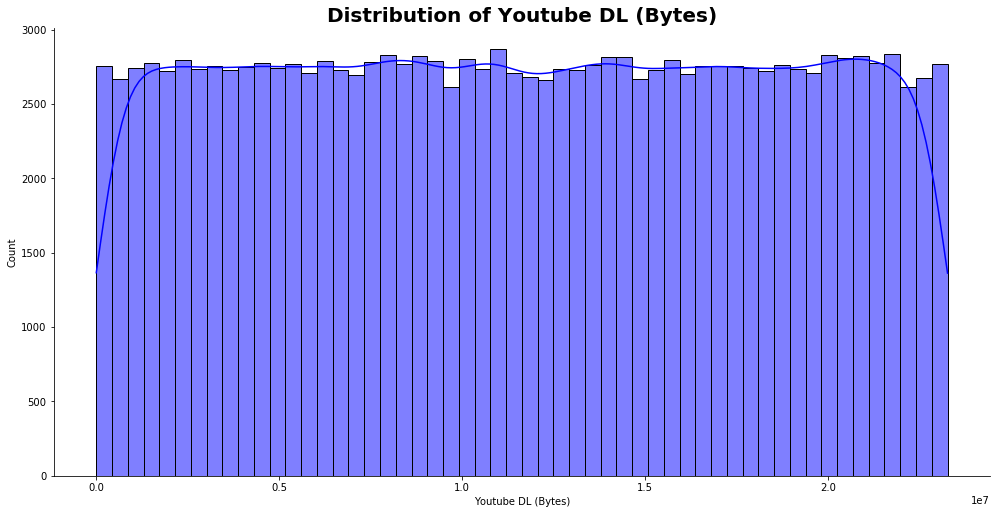

In [89]:
plot_hist(dfExp,'Youtube DL (Bytes)',"blue")

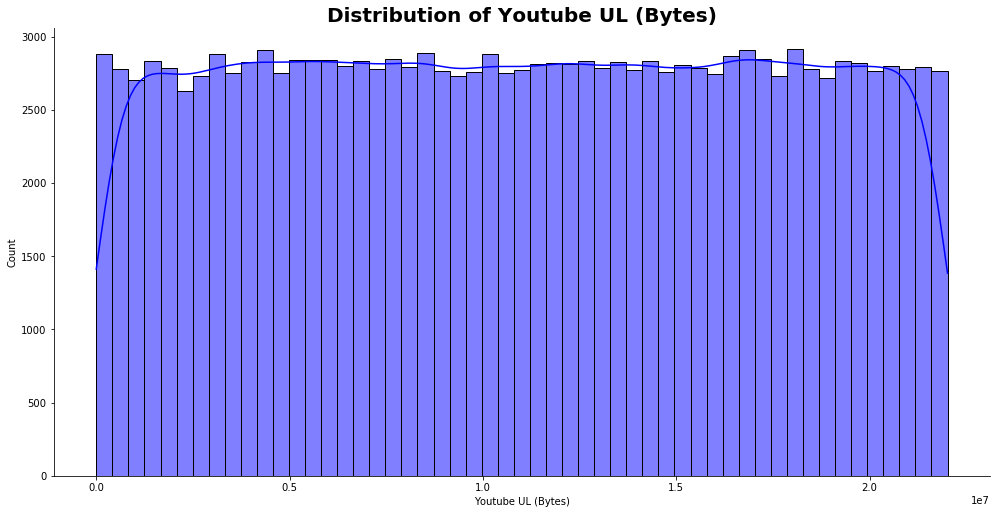

In [90]:
plot_hist(dfExp,  'Youtube UL (Bytes)',"blue")

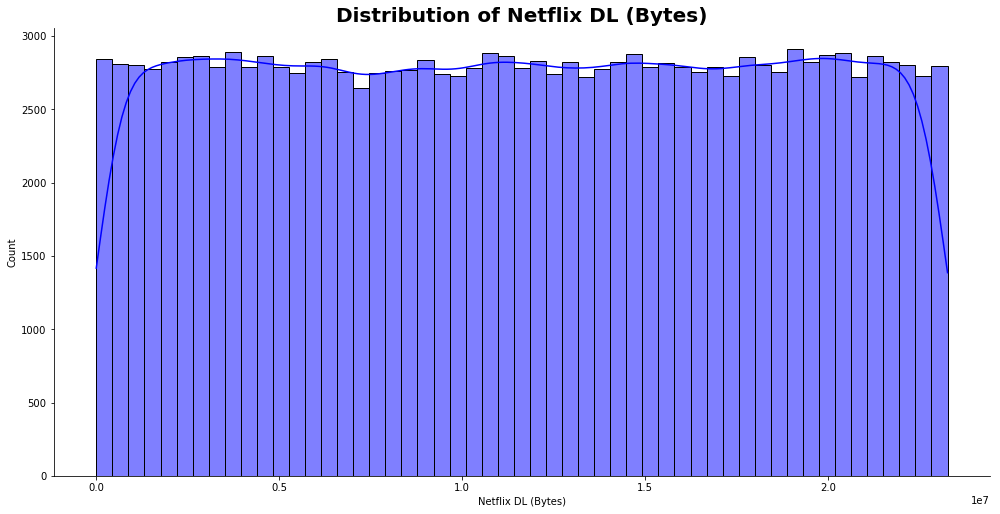

In [91]:
plot_hist(dfExp, 
       'Netflix DL (Bytes)',"blue")

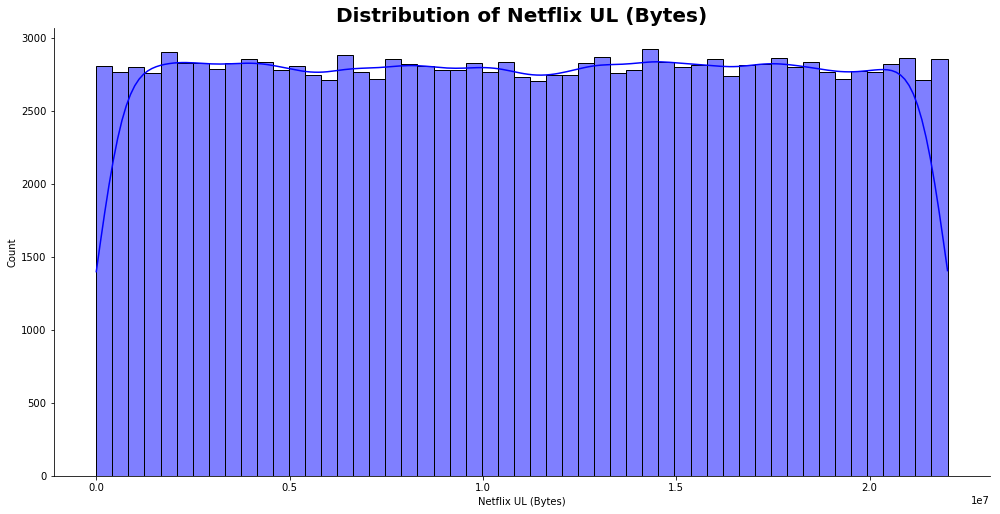

In [92]:
plot_hist(dfExp,  'Netflix UL (Bytes)',  "blue")

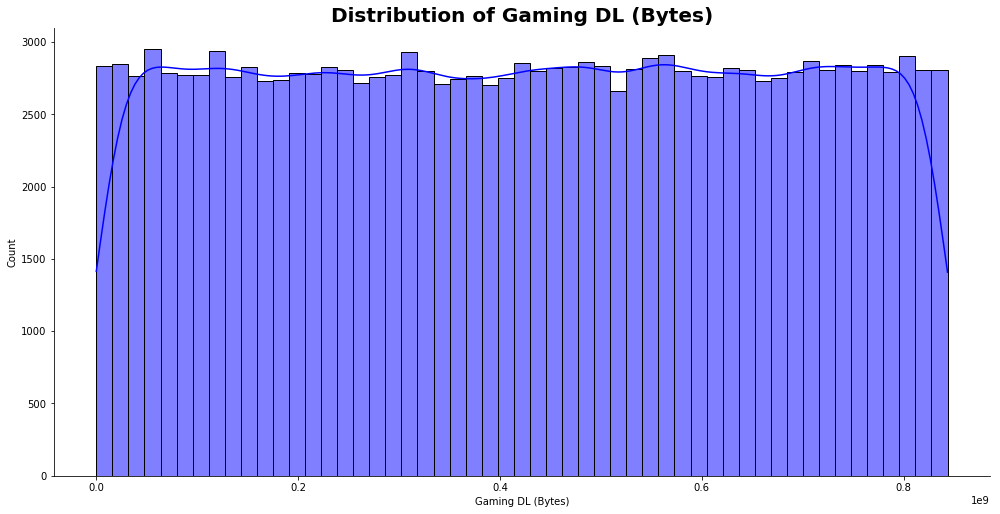

In [93]:
plot_hist(dfExp,'Gaming DL (Bytes)',"blue")

In [94]:
plot_hist(dfExp, 
       'Gaming UL (Bytes)', 'Other DL (Bytes)', "blue")

TypeError: plot_hist() takes 3 positional arguments but 4 were given

In [ ]:
plot_hist(dfExp, 'Other UL (Bytes)', "blue")

In [ ]:
plot_hist(dfExp, 'Total UL (Bytes)', "blue")

In [ ]:
plot_hist(dfExp, 'Total DL (Bytes)', "blue")

In [ ]:
dfExp["Start ms"]

In [104]:
### get numeric columns
numeric_d = df_clean._get_numeric_data()


In [ ]:
#  Categorical Data
a = 8  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

# fig = plt.figure(figsize=(10,8))

# for i in numeric_d.columns:
#     plt.subplot(a, b, c)
#     plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     sns.countplot(numeric_d[i])
#     c = c + 1

# plt.tight_layout()
# plt.show()

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

NameError: name 'tickers' is not defined

<Figure size 1080x864 with 0 Axes>

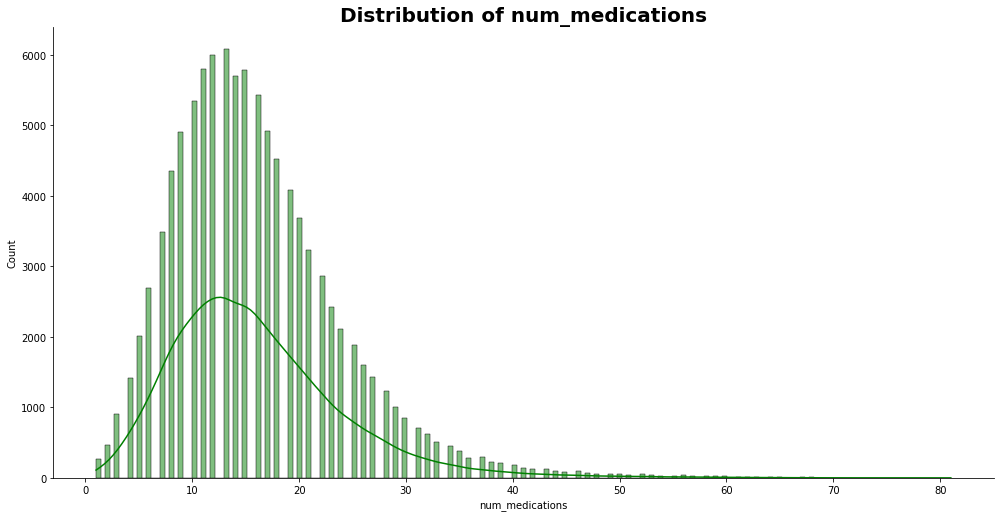

In [ ]:
plot_hist(dfExp, "num_medications", "green")

In [ ]:
dfExp["num_medications"].describe()

count   101,766.00
mean         16.02
std           8.13
min           1.00
25%          10.00
50%          15.00
75%          20.00
max          81.00
Name: num_medications, dtype: float64

#### Outliers

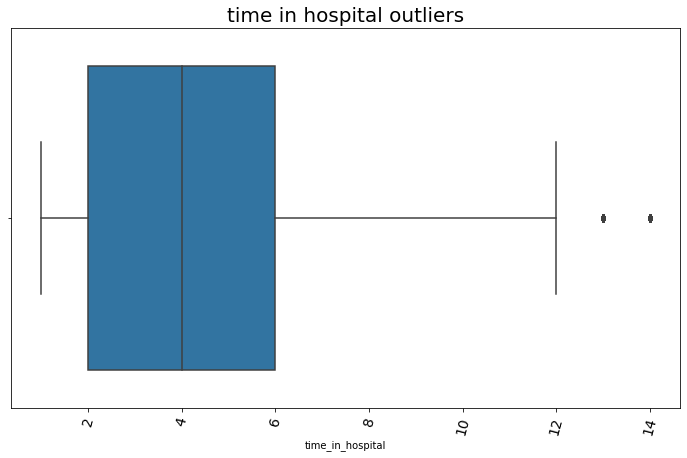

In [ ]:
plot_box(dfExp, "time_in_hospital", "time in hospital outliers")

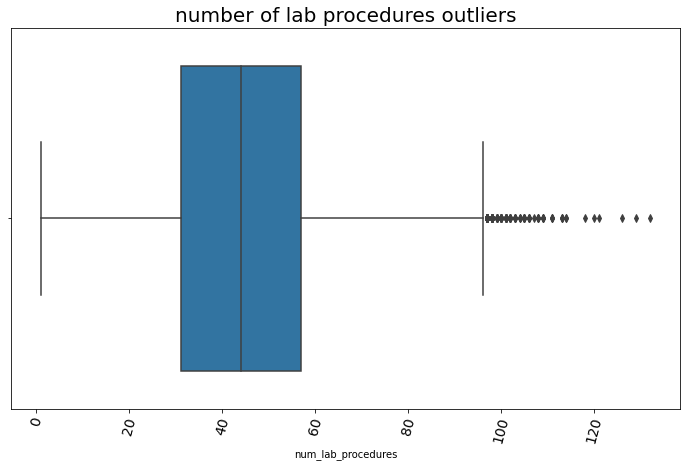

In [ ]:
plot_box(dfExp, "num_lab_procedures", "number of lab procedures outliers")

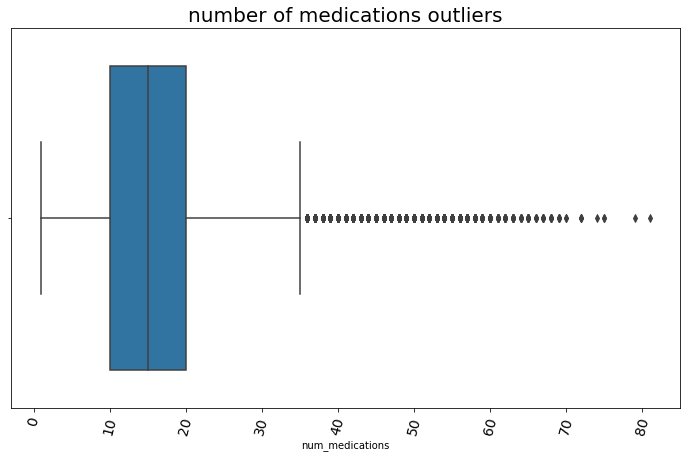

In [ ]:
plot_box(dfExp, "num_medications", "number of medications outliers")

In [ ]:
dfExp["fixed_num_medications"] = fix_outlier(dfExp, "num_medications")

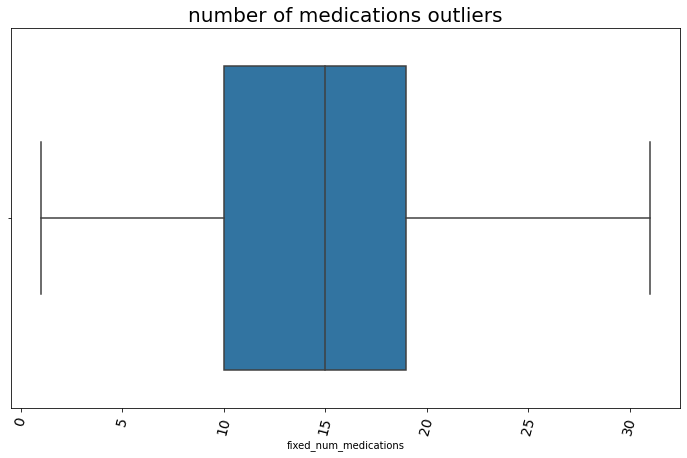

In [ ]:
plot_box(dfExp, "fixed_num_medications", "number of medications outliers")

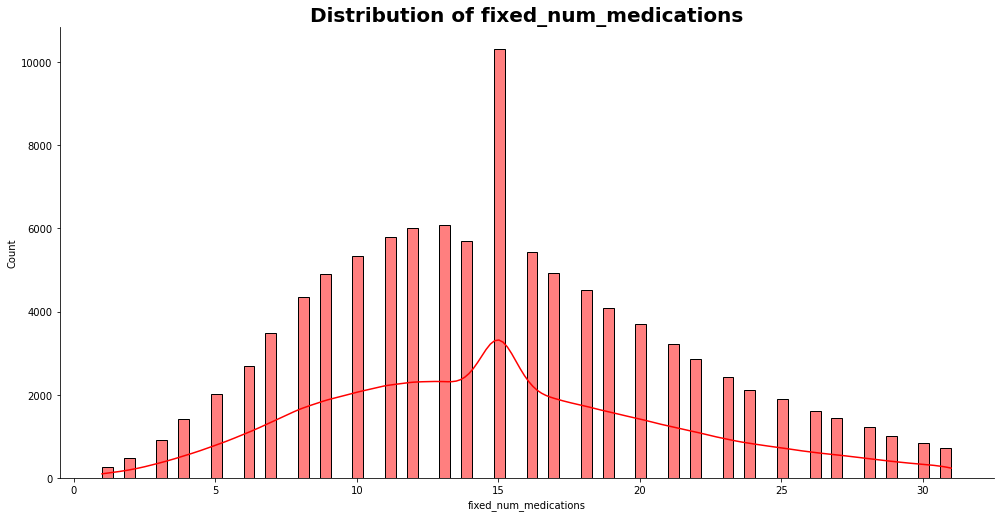

In [ ]:
plot_hist(dfExp, "fixed_num_medications", "red")

In [ ]:
dfExp["fixed_num_medications"].describe()

count   101,766.00
mean         14.95
std           6.23
min           1.00
25%          10.00
50%          15.00
75%          19.00
max          31.00
Name: fixed_num_medications, dtype: float64

#### categorical variables

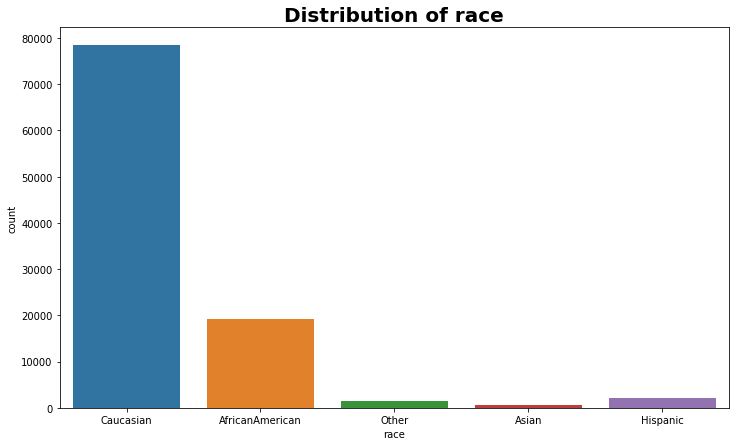

In [ ]:
plot_count(dfExp, "race")

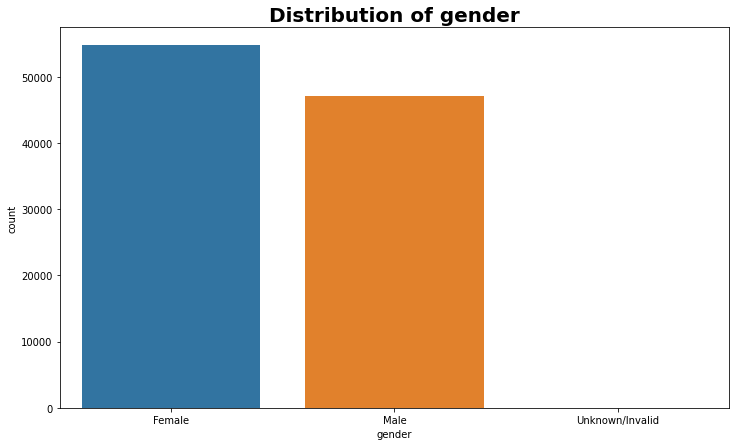

In [ ]:
plot_count(dfExp, "gender")

### Multivariate Analysis

This analysis that mainly done on two or more columns where we look for relationships between columns and how our data is distributed amoung values in multiple columns

#### scatter plots

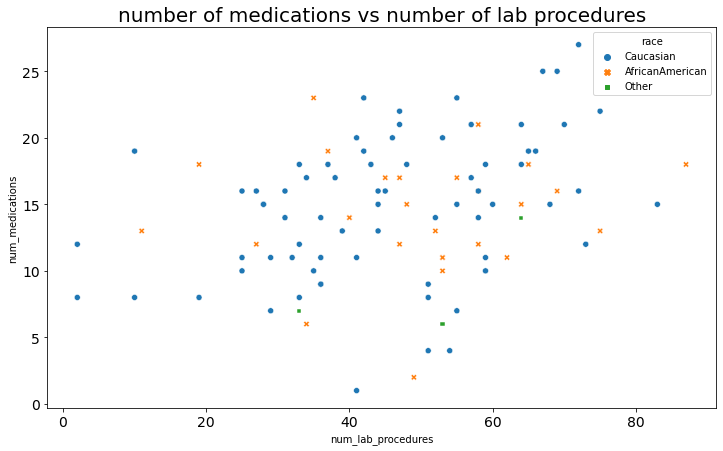

In [ ]:
plot_scatter(dfExp.head(100), x_col="num_lab_procedures", y_col="num_medications", hue="race",
             style="race", title="number of medications vs number of lab procedures")

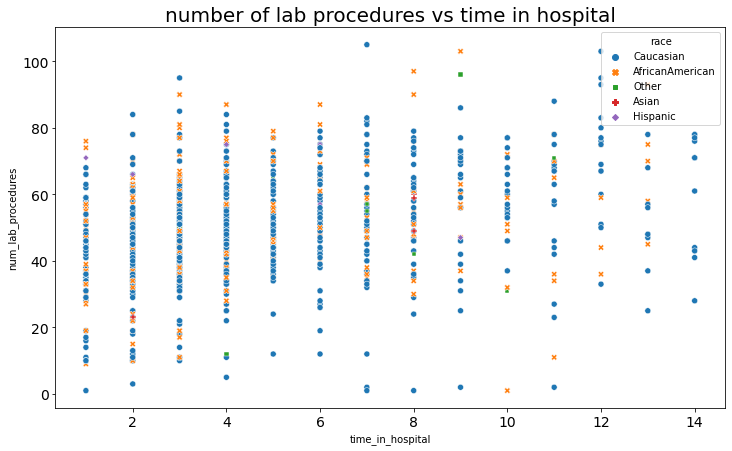

In [ ]:
plot_scatter(dfExp.head(1000), x_col="time_in_hospital", y_col="num_lab_procedures", hue="race",
             style="race", title="number of lab procedures vs time in hospital")

#### Box Plots

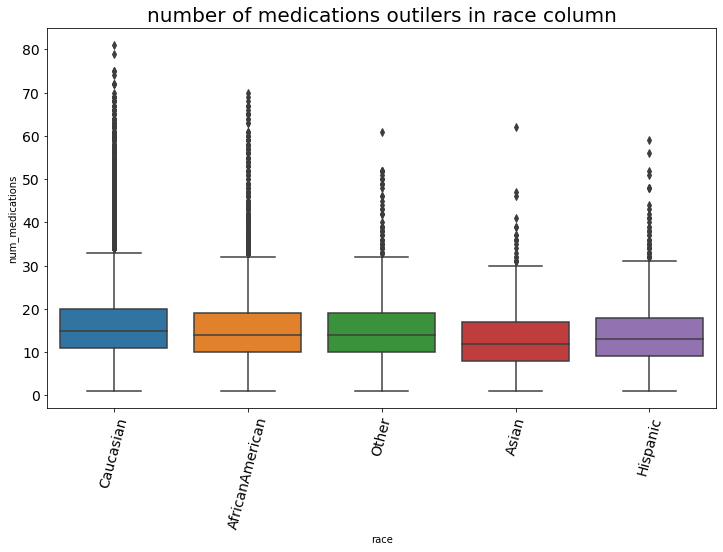

In [ ]:
plot_box_multi(dfExp, x_col="race", y_col="num_medications", title="number of medications outilers in race column")

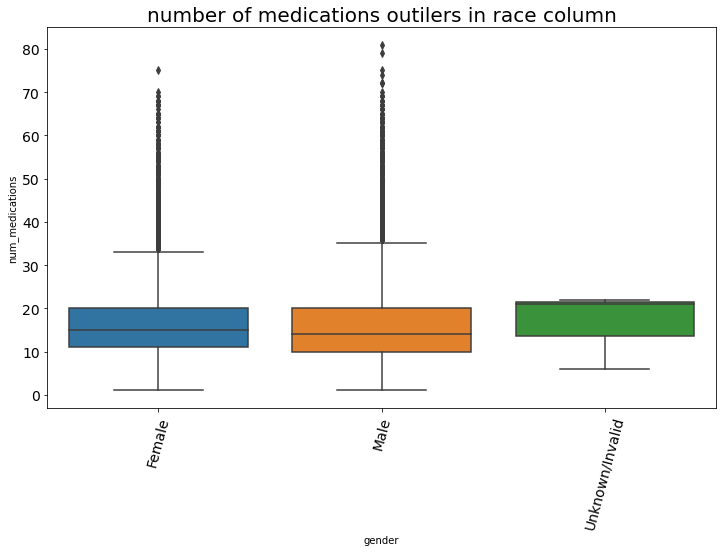

In [ ]:
plot_box_multi(dfExp, x_col="gender", y_col="num_medications", title="number of medications outilers in race column")

#### pair plots

pair plots also known as scatterplot matrix, they allow us to see both distributions of single columns and the relationship between two columns

In [ ]:
dfPair = dfExp[["race", "time_in_hospital", "num_procedures", "num_lab_procedures", "num_medications"]]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


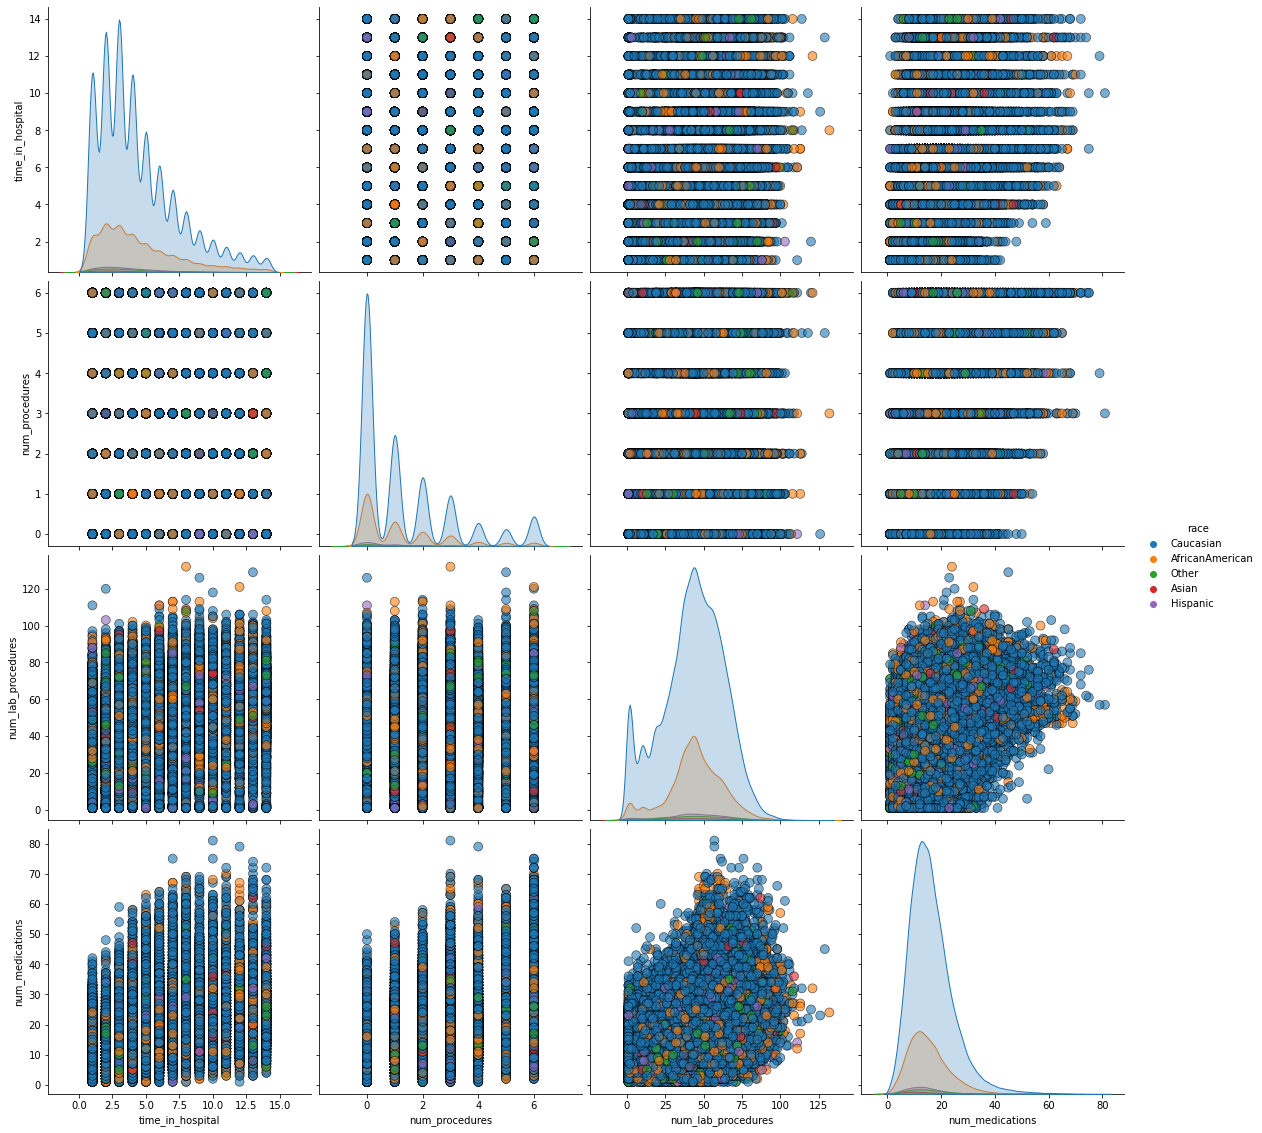

In [ ]:
sns.pairplot(dfPair, hue = 'race', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)